# 파이썬 언어 관계도
### 스택오버플로우 태그 데이터를 활용해 그려보기
[python network graph](https://www.kaggle.com/jncharon/python-network-graph/notebook)

In [2]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
links = pd.read_csv('stack_network_links.csv')
nodes = pd.read_csv('stack_network_nodes.csv')
print(links.shape)
print(nodes.shape)

(490, 3)
(115, 3)


In [5]:
links.head()

,source,target,value
0,azure,.net,20.933192
1,sql-server,.net,32.322524
2,asp.net,.net,48.407030
3,entity-framework,.net,24.370903
4,wpf,.net,32.350925


In [6]:
nodes.head()

,name,group,nodesize
0,html,6,272.45
1,css,6,341.17
2,hibernate,8,29.83
3,spring,8,52.84
4,ruby,3,70.14


In [10]:
# nodes['name'].value_counts()

In [24]:
# links['source'].unique()

In [16]:
# nodes의 column명을 links의 column명으로 바꾸어 줍니다.
links.columns

Index(['source', 'target', 'value'], dtype='object')

In [17]:
nodes.columns = ['source', 'target', 'value']

In [18]:
nodes.head()

,source,target,value
0,html,6,272.45
1,css,6,341.17
2,hibernate,8,29.83
3,spring,8,52.84
4,ruby,3,70.14


In [20]:
# nodes와 links를 하나의 데이터프레임으로 합쳐줍니다.
df = pd.concat([nodes, links])
df.shape

(605, 3)

In [21]:
df.head()

,source,target,value
0,html,6,272.45
1,css,6,341.17
2,hibernate,8,29.83
3,spring,8,52.84
4,ruby,3,70.14


In [23]:
g = nx.from_pandas_edgelist(df, source='source', target='target')
print(nx.info(g))

Name: 
Type: Graph
Number of nodes: 129
Number of edges: 360
Average degree:   5.5814


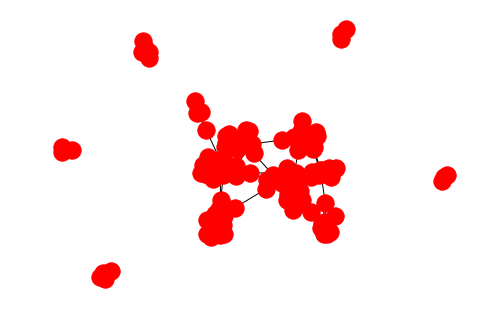

In [25]:
nx.draw(g)

### 개선하기

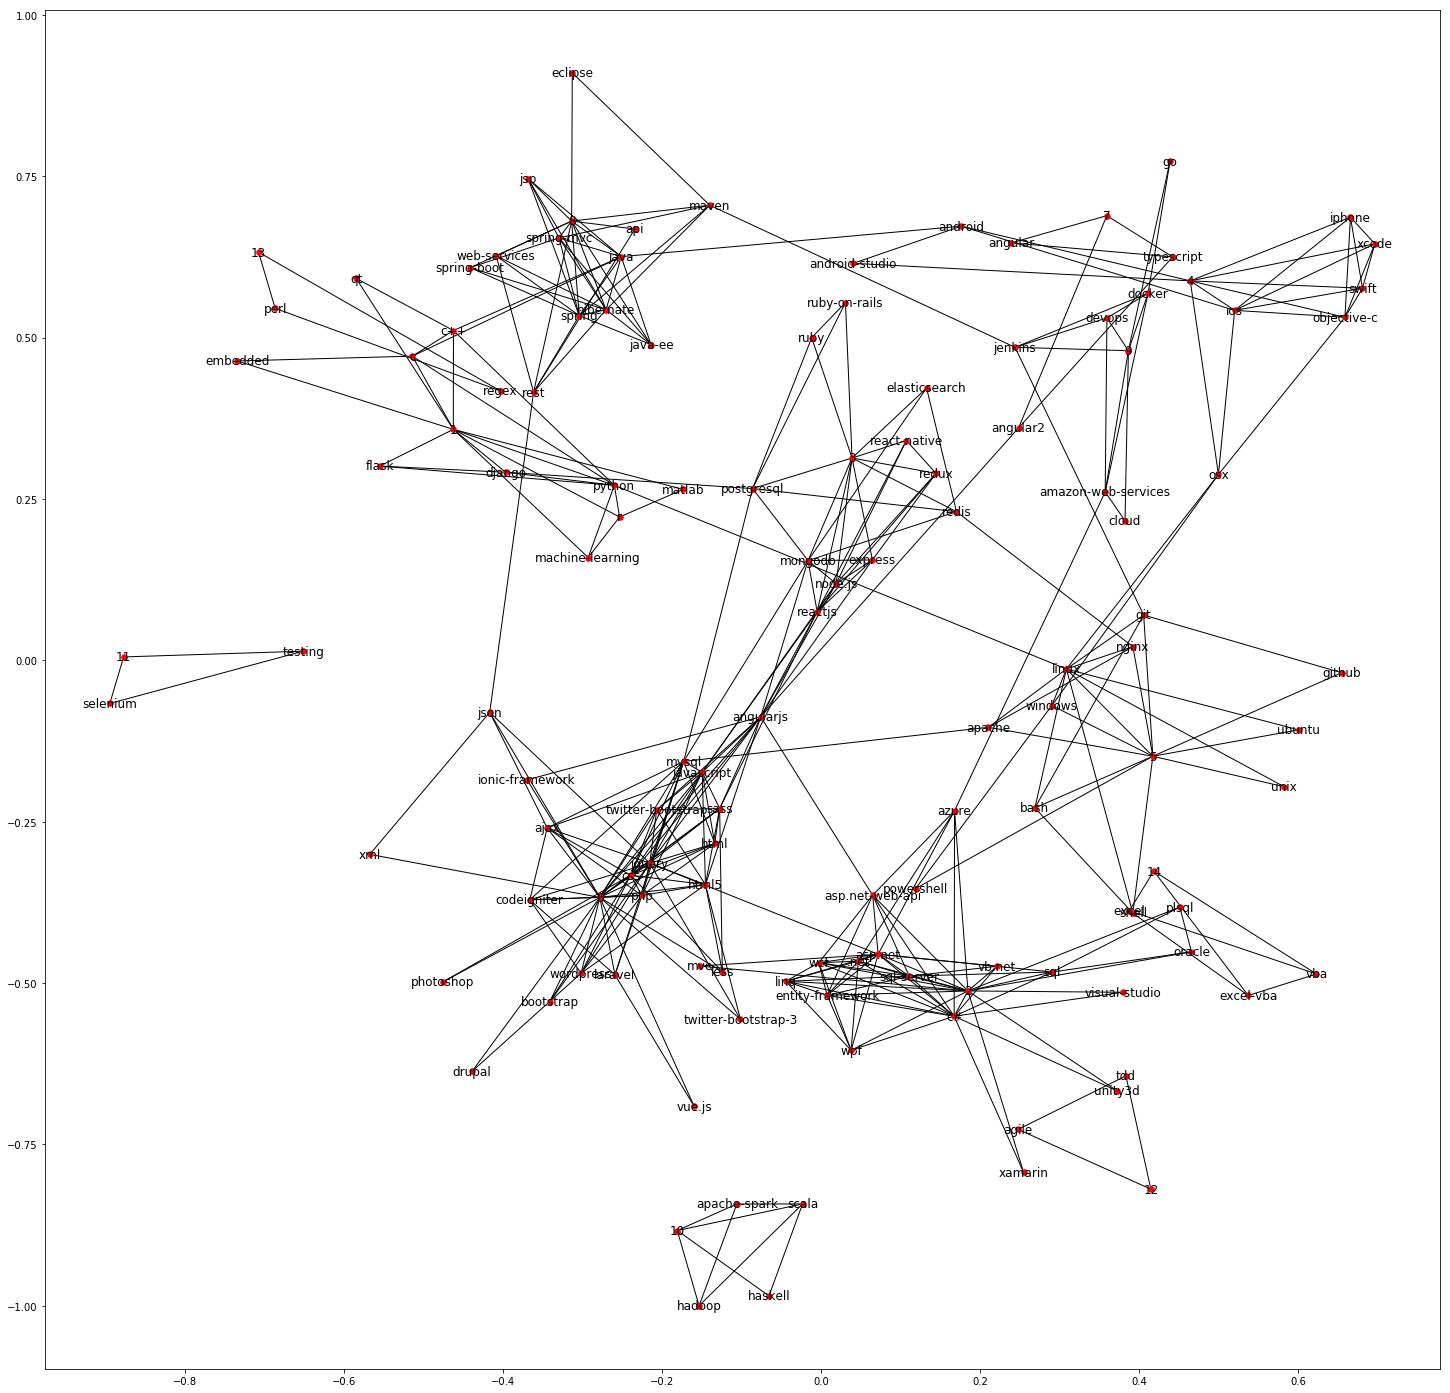

In [28]:
plt.figure(figsize=(25, 25))
pos = nx.spring_layout(g, k=0.3)  # k: 뭉쳐있고, 퍼져있는 비율을 정해줌.
nx.draw_networkx(g,pos,node_size=30, node_color='red')
plt.show()

### 좀 더 자세히 표현해보기

In [3]:
df_edges = pd.read_csv('stack_network_links.csv')
df_nodes = pd.read_csv('stack_network_nodes.csv')

In [4]:
G = nx.Graph()
plt.figure(figsize=(25, 25))

options = {
    'edge_color': '#FFDEA2',
    'width' : 1,
    'with_labels' : True,
    'font_weight' : 'regular',
    
}

# gephy를 사용하게 되면 여러 옵션들을 바로 확인해 볼 수 있음.

<Figure size 1800x1800 with 0 Axes>

In [5]:
size = [G.node[node]['nodesize']*10 for node in G]
# default=1 *10 해줌.

In [6]:
color_map = {1:'#f09494', 2:'#eebcbc', 3:'#72bbd0', 4:'#91f0a1', 5:'#629fff', 6:'#bcc2f2',  
             7:'#eebcbc', 8:'#f1f0c0', 9:'#d2ffe7', 10:'#caf3a6', 11:'#ffdf55', 12:'#ef77aa', 
             13:'#d6dcff', 14:'#d2f5f0'}

colors = [color_map[G.node[node]['group']] for node in G]

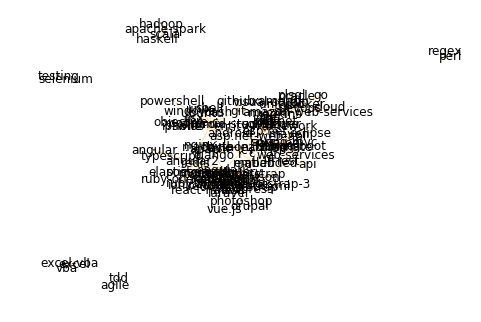

In [7]:
for index, row in df_nodes.iterrows():
    G.add_node(row['name'], group=row['group'], nodesize=row['nodesize'])

for index, row in df_edges.iterrows():
    G.add_weighted_edges_from([(row['source'], row['target'], row['value'])])
   

nx.draw(G, node_color=colors, node_size=size, pos=nx.spring_layout(G, k=0.25, iterations=50), **options)
ax = plt.gca()
ax.collections[0].set_edgecolor("#555555")
plt.show()    

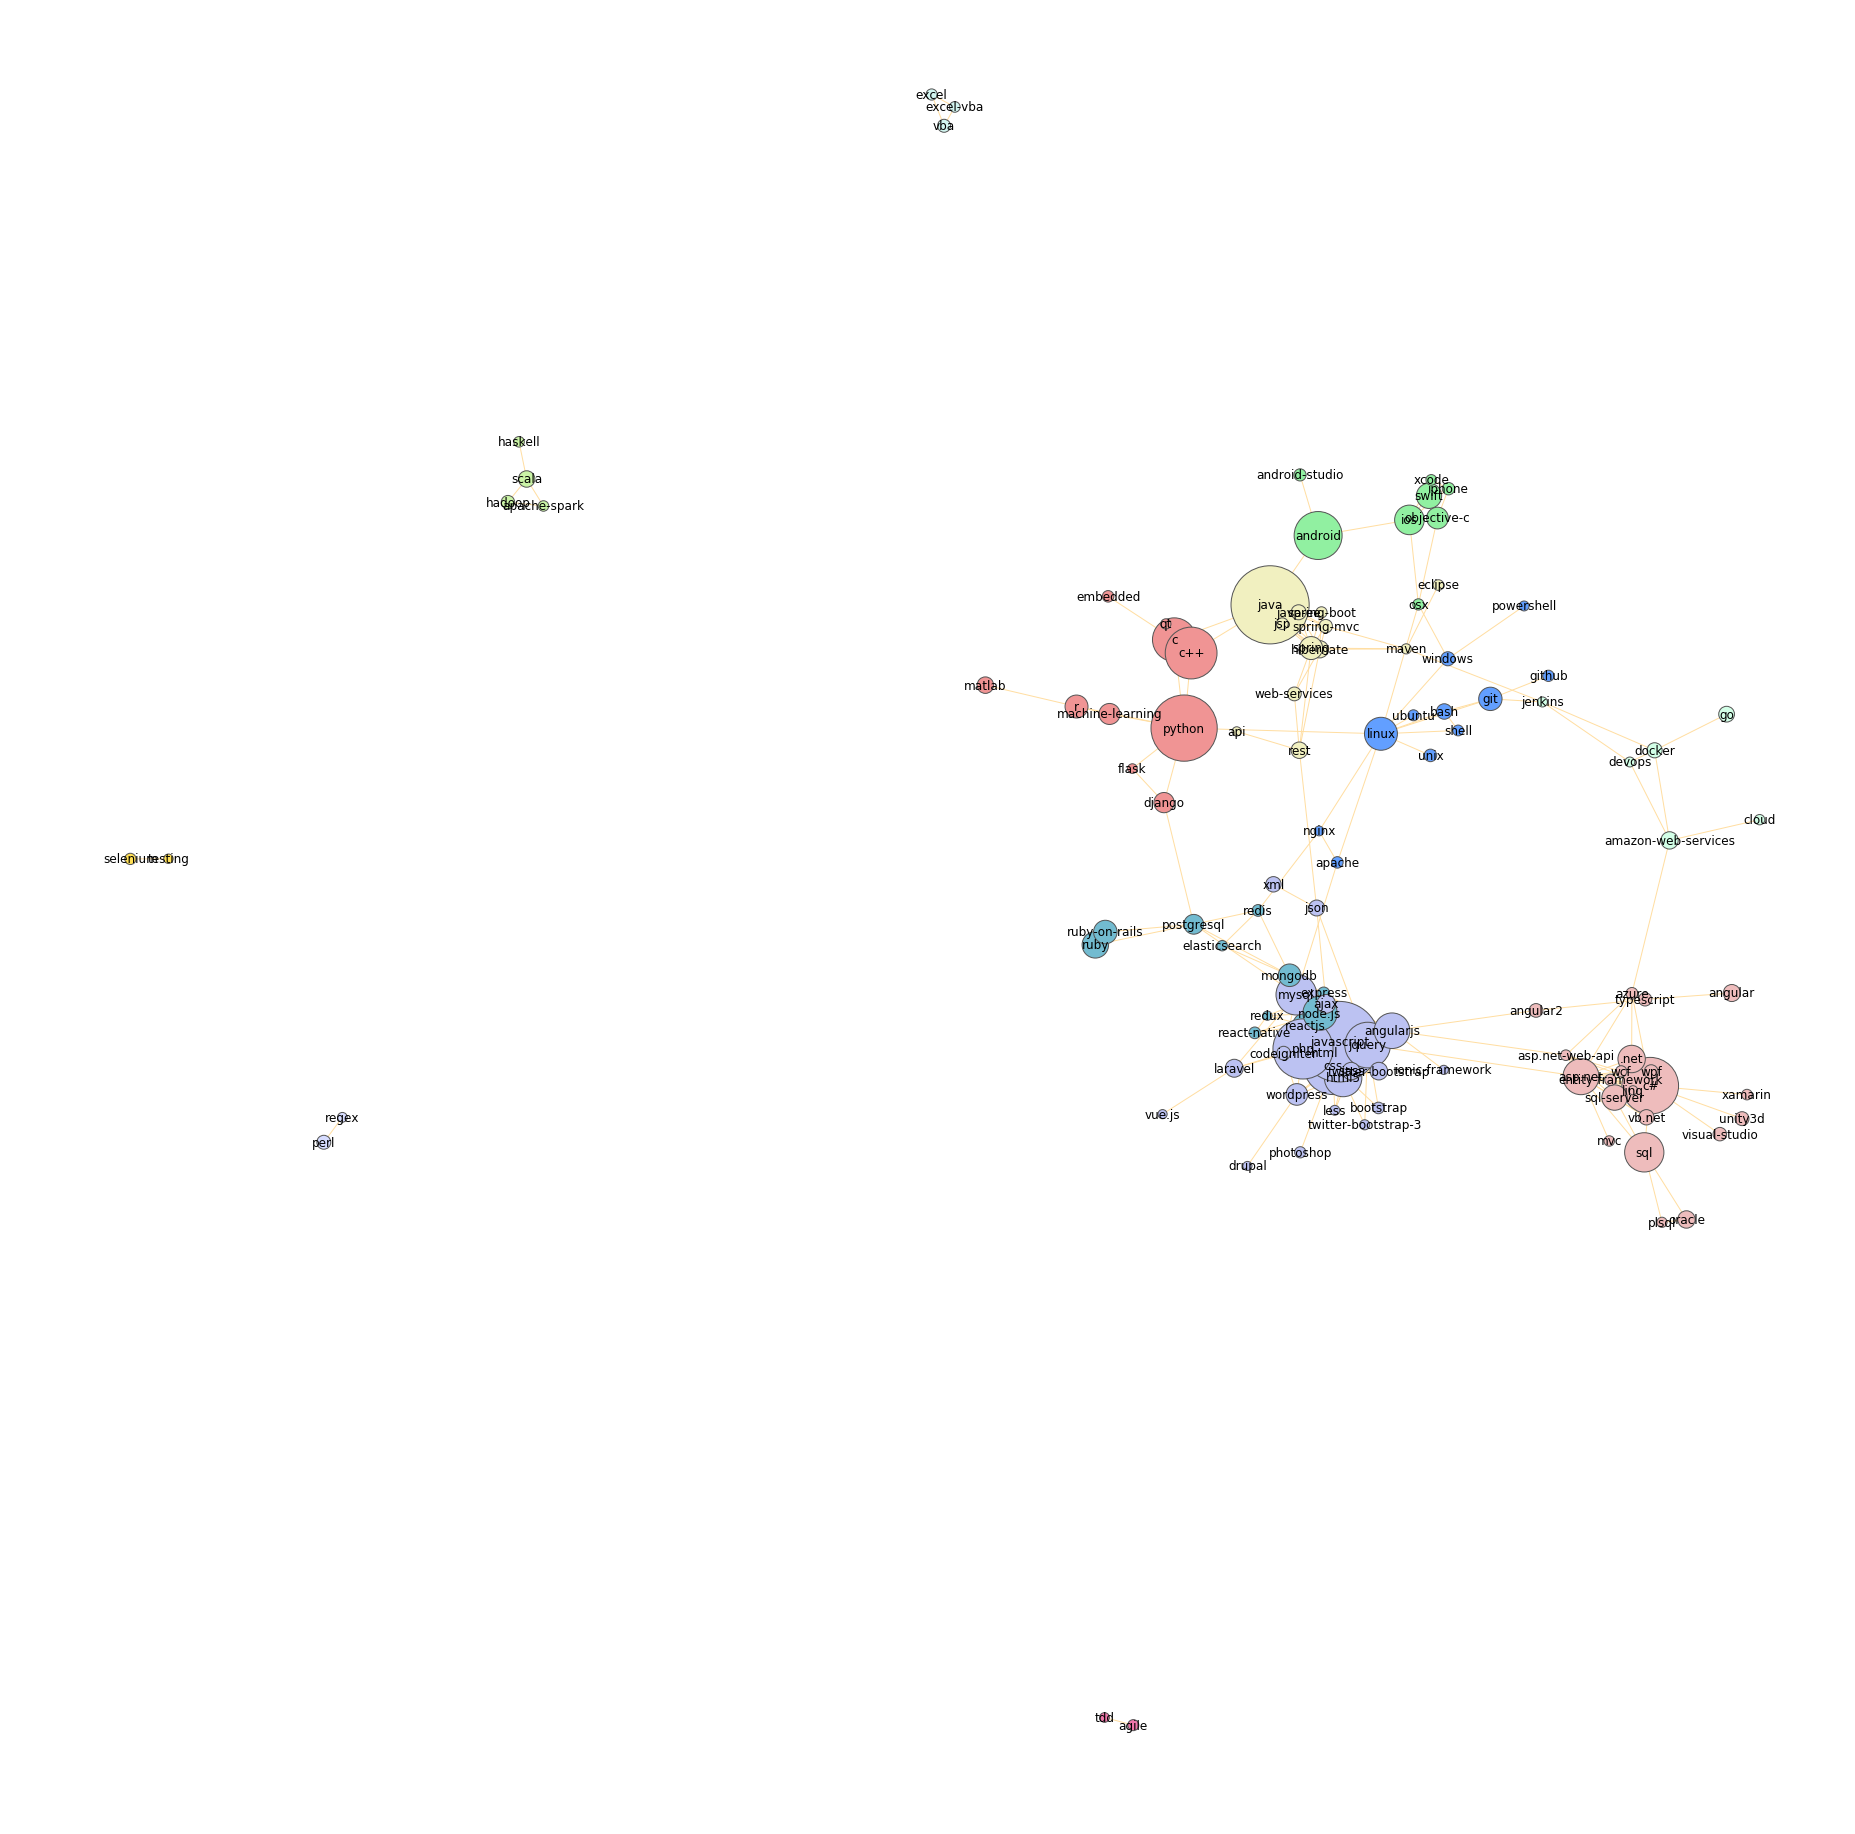

In [13]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

df_nodes = pd.read_csv('stack_network_nodes.csv')
df_edges = pd.read_csv('stack_network_links.csv')

G = nx.Graph()

for index, row in df_nodes.iterrows():
    G.add_node(row['name'], group=row['group'], nodesize=row['nodesize'])
    
for index, row in df_edges.iterrows():
    G.add_weighted_edges_from([(row['source'], row['target'], row['value'])])
    
color_map = {1:'#f09494', 2:'#eebcbc', 3:'#72bbd0', 4:'#91f0a1', 5:'#629fff', 6:'#bcc2f2',  
             7:'#eebcbc', 8:'#f1f0c0', 9:'#d2ffe7', 10:'#caf3a6', 11:'#ffdf55', 12:'#ef77aa', 
             13:'#d6dcff', 14:'#d2f5f0'} 

plt.figure(figsize=(25,25))
options = {
    'edge_color': '#FFDEA2',
    'width': 1,
    'with_labels': True,
    'font_weight': 'regular',
}
colors = [color_map[G.node[node]['group']] for node in G]
sizes = [G.node[node]['nodesize']*10 for node in G]

nx.draw(G, node_color=colors, node_size=sizes, pos=nx.spring_layout(G, k=0.25, iterations=50), **options)
ax = plt.gca()
ax.collections[0].set_edgecolor("#555555") 
plt.show()